<center><h1>Production forecasting of Volve production Rate</h1><center>

<center>
<h2>ICPE 689– Data Science for Intelligent Oil Filed Operations – Spring 2021</h2>    
<h3>Texas A&amp;M University<br>
Harold Vance Department of Petroleum Engineering<br><br>
Dr. Eduardo Gildin<br>
Marcelo Dall'Aqua<br><br>
Spring 2021<br>    
</h3>
</center>

This notebook is based on the work of [Abdelkarim Majdoub](https://www.discovervolve.com/2021/02/23/development-of-a-machine-learning-model-based-on-feature-selection-to-predict-volve-production-rate/) from  the [DiscoverVolve](https://www.discovervolve.com/), an website dedicated to undestand the Volve dataset.

## Volve Dataset

On June 14, 2018 [Equinor](https://www.equinor.com/en/what-we-do/digitalisation-in-our-dna/volve-field-data-village-download.html) officially made a complete set of data from a North Sea oil field available for research, study, and development purposes.  All subsurface and production data from a field on the Norwegian continental shelf (NCS) have been disclosed.

The dataset comprises approximately 40,000 files from the Volve field, which was in production from 2008 to 2016. The data has been released to give students and scientists a realistic case to study.  According to Equinor, they intend to support learning, innovation, and new solutions for the energy future.  

The Volve oil field, located 200 kilometers west of Stavanger at the southern end of the Norwegian sector, was decommissioned in September 2016 after 8.5 years in operation, more than twice as long as initially planned. 

![Volve](https://www.equinor.com/content/dam/statoil/image/platform-map-illustrations/volve-landscape-2.svg)


The development was based on production from the Mærsk Inspirer jack-up rig, with Navion Saga used as a storage ship to hold crude oil before export. Gas was piped to the Sleipner A platform for final processing and export. Volve reached a recovery rate of 54% and in March 2016 the license decided to shut down its production permanently. The field was initially scheduled for 3-5 years of operation.

At plateau Volve produced some 56,000 barrels per day and delivered a total of 63 million barrels. 

![jack-up rig](https://www.equinor.com/content/dam/statoil/image/norway/offshore/Volve-1189811-Maersk-16-9.jpg.transform/extra-large/image.jpg)


So, [download](https://www.discovervolve.com/2020/03/05/how-to-access-the-volve-dataset/) this fantastic resource and have fun!

Here, we are going to make your life easy. The provided file 'volve_production_cleaned.csv' contains all the information we are going to use.

## STOP and read this with attention
1. I am providing most of the code ready, but you will need to code yourself some parts of this notebook. The fields you should code are identified with the comment: **##### Insert your code here #############**
2. Read ALL the comments
3. Read ALL the coments. Especially the ones who have **"TIP"**

## Let's start by importing some packages

In [1]:
import warnings
warnings.filterwarnings("ignore")

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Additionals
from math import sqrt
from pprint import pprint

# The dataset

The Volve Data Village is an album of 11 different folders containing 9 data types: 1. Geophysical Interpretation, 2. Geoscience_OW_Archive, 3. Production data, 4. Reports, 5. Reservoir Modelling, 6. Seismic, 7. Logging Data, 8. Well technical data and 9 Drilling Data

Here, we will only work with the **Production data**. Which has the daily monitoring records of production and pressure data:
1. Date of production
2. Codes & Names as per NPD |Norwegian Petroleum Directorate|
     - Well Code & Name
     - Field Code & Name 
     - Facility Code & Name
3. Pressure Data
    - Downhole Pressure & Temperature
    - Average Tubing & Annular Pressure Details
4. Flow Data
    - Volumetric Data for Produced Gas, Oil & Water & Injected Water
    - Flow Kind (e.g. Spherical)
5. Other Data
    - Onstream Hours
    - Type of well
    - Choke Details (e.g. Choke Size, DP Ratio [=Pressure drop/downstream pressure])

However, we will start from a **cleaned** version of such dataset. In other words, we will not perform several essentials and time-consuming parts of any machine learning application: Exploratory Data Analysis (EDA), handle missing data, data 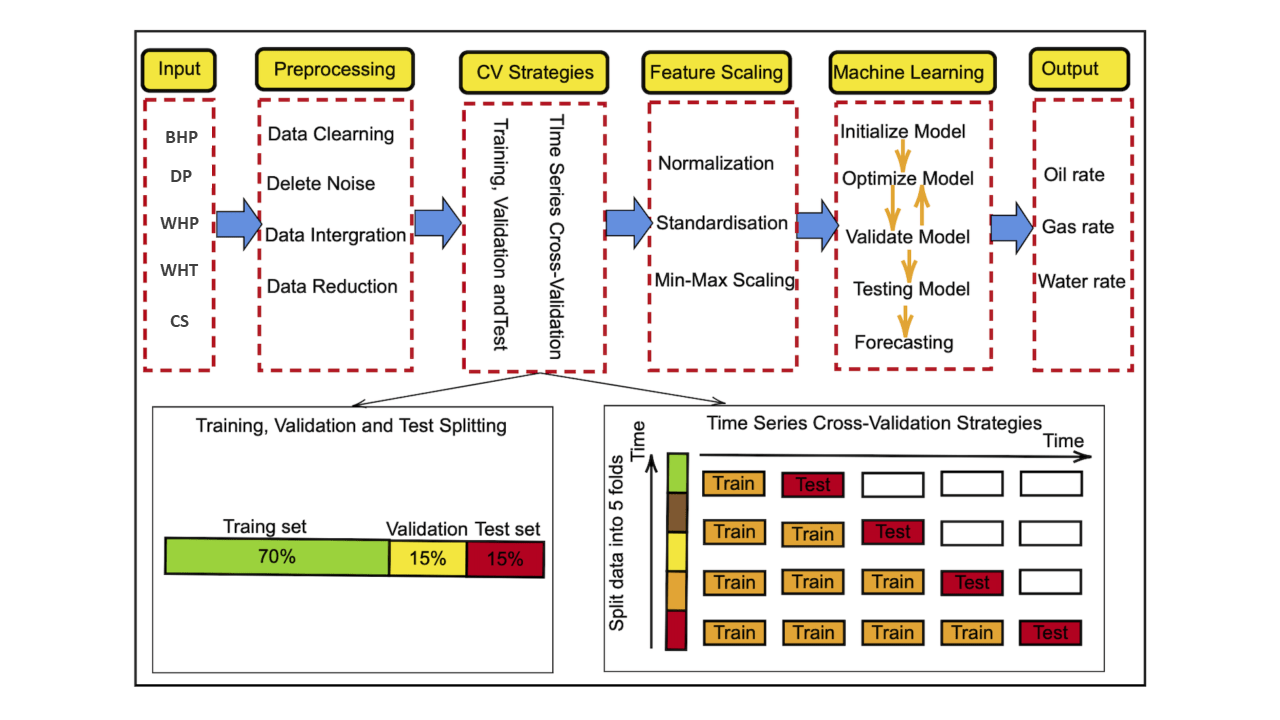cleaning, or any pre-processing step.

**Then the inputs used in this exercise are:**

- Onstream Hours
- Bottom hole pressure (BHP)
- Pressure differential in casing (DP)
- Well head pressure (WHP)
- Well head temperature (WHT)
- Choke size (CS)
- Dayly Oil Production
- Dayly Gas Production
- Dayly Water Production

In [2]:
# Read the dataset and take a look at it

# Your dataset should be named as 'data'
##### Insert your code here #############


filename = 'data.csv'
data = pd.read_csv(filename)
data

# Here we are setting a file path and where to get it, then letting 
# pandas read the file 

#########################################

,Unnamed: 0,DATEPRD,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,0,2014-04-22,7405,24.000,289.421362,182.059312,107.362050,37.939251,78.935409,631.47,90439.09,0.00
1,1,2014-04-23,7405,24.000,270.239793,171.052782,99.187011,60.756579,70.627109,1166.46,165720.39,0.00
2,2,2014-04-24,7405,24.000,262.842748,168.241977,94.600770,63.046800,66.049151,1549.81,221707.31,0.00
3,3,2014-04-25,7405,24.000,255.526995,165.538903,89.988092,64.547229,61.405386,1248.70,178063.52,0.00
4,4,2014-04-26,7405,24.000,247.199052,162.422242,84.776810,65.723694,56.147906,1345.78,192602.19,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...
7874,7874,2016-07-02,7289,24.000,194.983953,179.170590,15.813363,49.020020,1.259761,144.01,23201.35,203.93
7875,7875,2016-07-03,7289,24.000,194.977634,179.204392,15.773242,48.988494,1.198993,145.22,23068.07,202.93
7876,7876,2016-07-04,7289,24.000,194.317112,178.615149,15.701963,50.103416,1.279639,142.74,23059.68,203.84
7877,7877,2016-07-05,7289,24.000,195.207173,179.598751,15.608422,49.841092,1.204128,144.46,23090.47,202.76


Identify and remove all categorical columns  

In [3]:
##### Insert your code here #############
data.columns
data.info()



data['DATEPRD'] = data['DATEPRD'].astype('category')

data
data['DATEPRD'].unique()


feature_vectors = data.drop('DATEPRD', 1)
#looking at the data it was determined that the date was the only categorical coulumm
#it was removed because of that using the lines above 
#########################################

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7879 entries, 0 to 7878
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             7879 non-null   int64  
 1   DATEPRD                7879 non-null   object 
 2   NPD_WELL_BORE_CODE     7879 non-null   int64  
 3   ON_STREAM_HRS          7879 non-null   float64
 4   AVG_DOWNHOLE_PRESSURE  7879 non-null   float64
 5   AVG_DP_TUBING          7879 non-null   float64
 6   AVG_WHP_P              7879 non-null   float64
 7   AVG_WHT_P              7879 non-null   float64
 8   DP_CHOKE_SIZE          7879 non-null   float64
 9   BORE_OIL_VOL           7879 non-null   float64
 10  BORE_GAS_VOL           7879 non-null   float64
 11  BORE_WAT_VOL           7879 non-null   float64
dtypes: float64(9), int64(2), object(1)
memory usage: 738.8+ KB


## Data scaling
It is essential to normalize the quantitative data to avoid problems with different magnitudes in the data. 

In this project we use the MinMax normalization:
$x'=\frac{x-x_{min}}{x_{max}-x_{min}}$

In [4]:
from sklearn.preprocessing import MinMaxScaler
# TIP: whenever you see a line like the one above, you can see what function you should use. In this case: "MinMaxScaler"

# name your final scaled feature variable as "scaled_features" 
##### Insert your code here #############




scaler = MinMaxScaler().fit(feature_vectors)
scaled_features = scaler.transform(feature_vectors)






#########################################

data_scaled = pd.DataFrame(scaled_features, columns = feature_vectors.columns)
data_scaled.head(5)

,Unnamed: 0,NPD_WELL_BORE_CODE,ON_STREAM_HRS,AVG_DOWNHOLE_PRESSURE,AVG_DP_TUBING,AVG_WHP_P,AVG_WHT_P,DP_CHOKE_SIZE,BORE_OIL_VOL,BORE_GAS_VOL,BORE_WAT_VOL
0,0.000000,1.0,0.96,0.939509,0.702695,0.888107,0.405726,0.744427,0.106970,0.106227,0.054006
1,0.000127,1.0,0.96,0.877243,0.660213,0.820483,0.649736,0.666073,0.197620,0.194679,0.054006
2,0.000254,1.0,0.96,0.853231,0.649364,0.782545,0.674228,0.622899,0.262577,0.260460,0.054006
3,0.000381,1.0,0.96,0.829482,0.638931,0.744389,0.690274,0.579104,0.211555,0.209181,0.054006
4,0.000508,1.0,0.96,0.802449,0.626901,0.701281,0.702855,0.529522,0.228005,0.226263,0.054006


# PROBLEM STATEMENT
**Suppose that after a long time of production, a sensor is malfunctioning, and we lost some information for a certain period. Can we construct a machine learning to estimate these values?**

Let's assume we have lost the **oil production** information. In other words, our **target (or "y")** is  "BORE_OIL_VOL" and our **features (or "x")** are the rest of sensors. But to make our problem more interesting, let's remove the gas production '''BORE_GAS_VOL'' from the features since there is a high correlation between oil and gas production.

In [5]:
# Create your X (features) and Y (targets) from the dataset
# Let's assume the missing information (testing set) is 30% of the original dataset (i.e., test_size=0.3)
##### Insert your code here #############



X = data_scaled.drop(['BORE_GAS_VOL', 'BORE_OIL_VOL'],1)
y = data_scaled['BORE_OIL_VOL']


#########################################

print('Features shape:', X.shape)
print('Target shape', y.shape)

Features shape: (7879, 9)
Target shape (7879,)


**Training and Testing sets**

So, when we split the data in Training and Testing set, what we are saying is that the testing set is the "lost" information. However, since we do have this data, we can use it at the end to check our estimative

In [6]:
from sklearn.model_selection import train_test_split

# Create X_train, X_test, y_train, y_test
##### Insert your code here #############

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=50)




#########################################

In [7]:
# this will convert the Pandas Dataframe into Numpy arrays with shape of (n, )
#  since some sklearn functions ask for numpy arrays
y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

We are going to use this same data set (train and test) to check the performance of some ML algorithms. 
- Multiple Linear Regression
- Elastic Net
- Artificial Neural Network
- Random Forest Regressor

Let's start for the "most famous" method:

# Multiple Linear Regression 


In [8]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

# initiate your linear regression
##### Insert your code here #############

model = LinearRegression()
model.fit(X_train, y_train)

#########################################

LinearRegression()

**Hyperparameter optimization / Cross-validation**

We will use the sklearn function RFECV
<blockquote>
Given an external estimator that assigns weights to features (e.g., the coefficients of a linear model), the goal of recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. <br><br>
    First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through any specific attribute (such as coef_, feature_importances_) or callable.<br><br>
    Then, the least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

RFECV performs RFE in a cross-validation loop to find the optimal number of features.</blockquote>

In [9]:
# Feature ranking with recursive feature elimination and cross-validated selection of the best number of features.
# use RFECV and name it 'selector'

# TIP: go to the help of this function and find how can you set a 3-fold cross validation 
##### Insert your code here #############


selector = RFECV(model, step=1, cv=3)
selector = selector.fit(X_test, y_test)




#########################################

print('Variables selected: ' + str(np.sum(selector.support_)))
print('Variables deleted: ' + str(X_train.shape[1] - np.sum(selector.support_)))

list(zip(X_train.columns,selector.support_,selector.ranking_))

Variables selected: 9
Variables deleted: 0


[('Unnamed: 0', True, 1),
 ('NPD_WELL_BORE_CODE', True, 1),
 ('ON_STREAM_HRS', True, 1),
 ('AVG_DOWNHOLE_PRESSURE', True, 1),
 ('AVG_DP_TUBING', True, 1),
 ('AVG_WHP_P', True, 1),
 ('AVG_WHT_P', True, 1),
 ('DP_CHOKE_SIZE', True, 1),
 ('BORE_WAT_VOL', True, 1)]

As we can see, the variables showing True is essential for the model, and the False variable is not needed. If we want to add the False variable to the model, there is also a rank associated with them to add the variables in that order.

**Training**

Now, we build the model using statsmodel for detailed statistics. I am using "statsmodel" because scikit-learn does not provide p-values for multiple linear regression

In [10]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train.loc[:, selector.support_] 
# If you want to know about the command "loc", take a look at the PANDAS section of the "First steps in Python_v2.ipynb" 

# Adding a constant variable 
import statsmodels.api as sm  # if a error happens here, you need to install the statsmodels packages 
                              # At least two options:
                              #     1 - https://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/
                              #     2 - https://docs.anaconda.com/anaconda/user-guide/tasks/install-packages/
X_train_rfe = sm.add_constant(X_train_rfe)

linear_regression = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

print(linear_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.689
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     1356.
Date:                Wed, 31 Mar 2021   Prob (F-statistic):               0.00
Time:                        15:59:23   Log-Likelihood:                 3592.3
No. Observations:                5515   AIC:                            -7165.
Df Residuals:                    5505   BIC:                            -7099.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.21

**Feature importance**

Let's see the importance of each feature based on the absolute value of their coefficients

9 features, reduction of 0.00%


<AxesSubplot:>

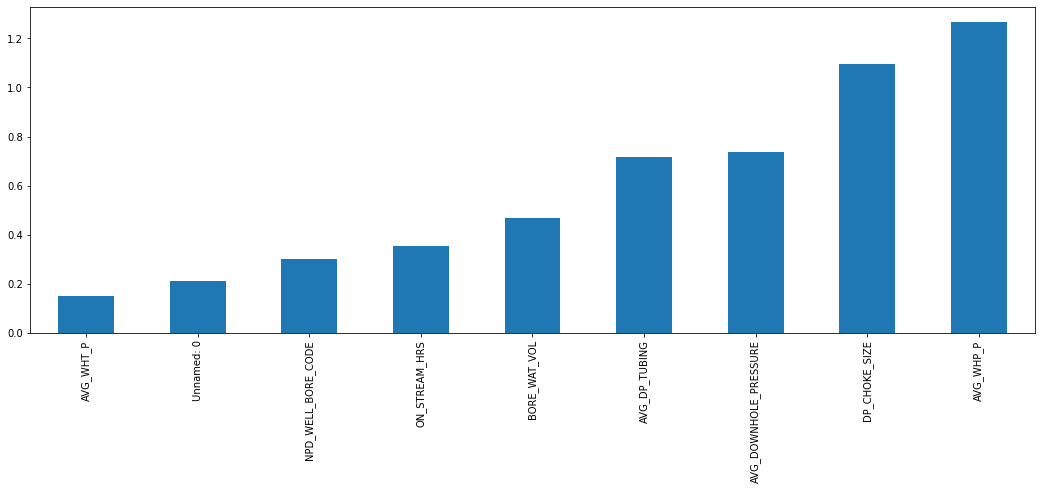

In [11]:
feature_importance = pd.Series(index = X_train_rfe.columns, data = np.abs(linear_regression.params))
feature_importance.drop(feature_importance.index[0],inplace=True)


n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

**Evaluation of parameters in the test set**

In [12]:
X_test_rfe = X_test.loc[:, selector.support_]
X_test_rfe = sm.add_constant(X_test_rfe)

y_pred_lr = linear_regression.predict(X_test_rfe)

## Save predition in a Dataframe
prediction = pd.DataFrame({'Actual':y_test,
                         'Linear Regression':y_pred_lr} )


# Summarize the data in a Dataframe
comparison = pd.DataFrame( {'R2': [round(r2_score(y_test, y_pred_lr),2)],
                           'Mean absolute error': [round(mean_absolute_error(y_test, y_pred_lr),2)],
                           'Root mean squared error': [round(sqrt(mean_squared_error(y_test, y_pred_lr)),2)]}, index=['Multiple Linear Regression'])

comparison

,R2,Mean absolute error,Root mean squared error
Multiple Linear Regression,0.71,0.1,0.13


# Elastic Net

Moving to a more elaborate method. Let's try Elastic Net, which is multiple linear regression with two regularization types (Ridge and Lasso). Inside Scikit-learn, Elastic Net is defined as the minimization function of
$$\frac{1} {2 * n_{samples}} * ||y - Xw||^2_2+ \alpha * L_{1_{ratio}} * ||w||_1 + 0.5 * \alpha * (1 - L_{1_{ratio}}) * ||w||^2_2$$

In [13]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet



#TIP: we have imported two function: ElasticNetCV and ElasticNet
#     check their help since they might be usefull

**Hyperparameter optimization / Cross-validation**

Again, scikit-learn saves our time with a function that barely does everything to us

In [14]:
# Create a dictionary with the hyperparameters you want to check
# Choose at least two hyperparameters
##### Insert your code here #############

#param_grid_strat = {'l1_ratio' : [0.1, 0.3, 0.5, 0.7, 0.9, 1.0],
                  #'alphas' : [None]}

#l1_ratio = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0]
#n_alphas = [1], cv=3, random_state=0

    
# I could not get it to enter the line below in so I willl enter it manually
#########################################

# Then define the cross validation method
# name it "cv_model"
##### Insert your code here ############

cv_model = ElasticNetCV(l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0], n_alphas= 100, cv=5)
                  
cv_model
#########################################

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0])

In [15]:
# Perform cross validation
##### Insert your code here #############

cv_model.fit(X_train, y_train)


#########################################

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.3, 0.5, 0.7, 0.9, 1.0])

In [16]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00009243
Optimal l1_ratio: 0.300
Number of iterations 397


**Training**

In [17]:
# train model with best parameters from CV
# Remember that you have to initiate the model with the best hyperparmenters
# and then perform the training (fit) itself
##### Insert your code here #############

elastic = ElasticNet(cv_model.alpha_, cv_model.l1_ratio_, cv_model.n_iter_)
elastic = elastic.fit(X_train, y_train)

#########################################

9 features, reduction of 0.00%


<AxesSubplot:>

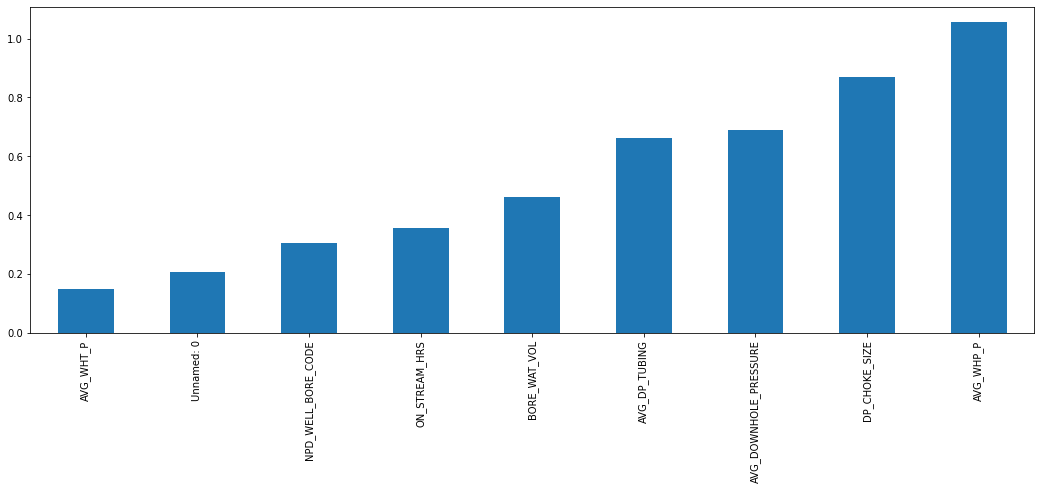

In [18]:
feature_importance = pd.Series(index = X_train.columns, data = np.abs(elastic.coef_))

n_selected_features = (feature_importance>0).sum()
print('{0:d} features, reduction of {1:2.2f}%'.format(
    n_selected_features,(1-n_selected_features/len(feature_importance))*100))

feature_importance.sort_values().tail(30).plot(kind = 'bar', figsize = (18,6))

**Evaluation of parameters in test set**

In [19]:
#Predict - name the prediction as "y_pred_en"
##### Insert your code here #############

y_pred_en = elastic.predict(X_test)


#########################################

## Save predition in a Dataframe
prediction['Elastic Net'] = y_pred_en 

# Summarize the data in a Dataframe
comparison.loc['Elastic Net'] = {'R2': round(r2_score(y_test, y_pred_en),2),
                            'Mean absolute error': round(mean_absolute_error(y_test, y_pred_en),2),
                           'Root mean squared error': round(sqrt(mean_squared_error(y_test, y_pred_en)),2)}

comparison

,R2,Mean absolute error,Root mean squared error
Multiple Linear Regression,0.71,0.1,0.13
Elastic Net,0.71,0.1,0.13


# Artificial Neural Net

In [20]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold
nn_regresson = MLPRegressor()

**Hyperparameter optimization / Cross-validation**

In [21]:
# Create a dictionary with the hyperparameters you want to check
# Choose at least two hyperparameters
##### Insert your code here #############



cv_strategy = KFold(n_splits=3, shuffle = True, random_state=125)


param_grid_strat = {'hidden_layer_sizes' : [(25,50,75), (50,100,50), (100,1)],
                   'alpha' : [0.0001, 0.05],
                   'solver' : ['sgd']}
    

#########################################

# Then define the cross validation method
# name it "cv_model"
##### Insert your code here #############


cv_model = KFold(n_splits=3, shuffle = False, random_state=None)

#########################################

In [22]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# Perform a CV grid search and show the best parameters
# you have two options: look their help and choose one

##### Insert your code here #############

grid = GridSearchCV(nn_regresson, param_grid=param_grid_strat, cv=cv_strategy, verbose=3)  



#########################################

In [23]:
grid.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=(25, 50, 75), solver=sgd; total time=   1.3s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=(25, 50, 75), solver=sgd; total time=   1.1s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=(25, 50, 75), solver=sgd; total time=   1.9s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=(50, 100, 50), solver=sgd; total time=   1.7s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=(50, 100, 50), solver=sgd; total time=   1.3s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=(50, 100, 50), solver=sgd; total time=   1.7s
[CV 1/3] END alpha=0.0001, hidden_layer_sizes=(100, 1), solver=sgd; total time=   0.3s
[CV 2/3] END alpha=0.0001, hidden_layer_sizes=(100, 1), solver=sgd; total time=   0.3s
[CV 3/3] END alpha=0.0001, hidden_layer_sizes=(100, 1), solver=sgd; total time=   0.3s
[CV 1/3] END alpha=0.05, hidden_layer_sizes=(25, 50, 75), solver=sgd; total time=   1.5s
[CV 2/3] END alpha=0.05, hidden_layer_siz

GridSearchCV(cv=KFold(n_splits=3, random_state=125, shuffle=True),
             estimator=MLPRegressor(),
             param_grid={'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(25, 50, 75), (50, 100, 50),
                                                (100, 1)],
                         'solver': ['sgd']},
             verbose=3)

In [24]:
best_params = grid.best_params_
print(best_params)

{'alpha': 0.05, 'hidden_layer_sizes': (50, 100, 50), 'solver': 'sgd'}


**Training**

In [25]:
# Perform the training with the best parameters obtained
##### Insert your code here #############


clf = MLPRegressor(**grid.best_params_)        
clf = clf.fit(X_train,y_train)




#########################################

**Evaluation of parameters in the test set**

In [26]:
#Predict - name the prediction as "y_pred_nn"
##### Insert your code here #############

y_pred_nn = clf.predict(X_test)


#########################################

## Save predition in a Dataframe
prediction['Artificial Neural Network'] = y_pred_nn 

comparison.loc['Artificial Neural Network'] = {'R2': round(r2_score(y_test, y_pred_nn),2),
                                            'Mean absolute error': round(mean_absolute_error(y_test, y_pred_nn),2),
                                            'Root mean squared error': round(sqrt(mean_squared_error(y_test, y_pred_nn)),2)}

comparison

,R2,Mean absolute error,Root mean squared error
Multiple Linear Regression,0.71,0.1,0.13
Elastic Net,0.71,0.1,0.13
Artificial Neural Network,0.68,0.1,0.13


## Random Forest Regressor

In [27]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestRegressor(random_state = 42)

**Hyperparameter optimization / Cross-validation**

In [36]:
# Create a dictionary with the hyperparameters you want to check
# Choose at least 3 hyperparameters
##### Insert your code here #############

param_grid_strat = {'n_estimators' : [10, 100, 200, 500],
                   'min_samples_split': [2, 7, 15, 25, 50],
                   'max_depth' : [1, 10, 15]}


#########################################

In [37]:
# Use the random grid to search for best hyperparameters
# Random search of parameters, using 3 fold cross validation, 
# search across different combinations.
##### Insert your code here #############

rf_random = RandomizedSearchCV(rf, param_grid_strat, cv=3)



#########################################

In [38]:
# Fit the random search model
##### Insert your code here #############


rf_random.fit(X_train, y_train)


#########################################

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42),
                   param_distributions={'max_depth': [1, 10, 15],
                                        'min_samples_split': [2, 7, 15, 25, 50],
                                        'n_estimators': [10, 100, 200, 500]})

In [39]:
# Obtaining the best parameters
rf_random.best_params_

{'n_estimators': 200, 'min_samples_split': 7, 'max_depth': 15}

**Training**

In [40]:
##### Insert your code here #############


clf = RandomForestRegressor(**rf_random.best_params_)        
clf = clf.fit(X_train,y_train)


#########################################

**Evaluation of parameters in test set**

In [41]:
#Predict - name the prediction as "y_pred_rf"
##### Insert your code here #############

y_pred_rf = clf.predict(X_test)



#########################################

## Save predition in a Dataframe
prediction['Random Forest Regressor'] = y_pred_rf 

comparison.loc['Random Forest Regressor'] = {'R2': round(r2_score(y_test, y_pred_rf),2),
                                            'Mean absolute error': round(mean_absolute_error(y_test, y_pred_rf),2),
                                            'Root mean squared error': round(sqrt(mean_squared_error(y_test, y_pred_rf)),2)}

comparison

,R2,Mean absolute error,Root mean squared error
Multiple Linear Regression,0.71,0.10,0.13
Elastic Net,0.71,0.10,0.13
Artificial Neural Network,0.68,0.10,0.13
Random Forest Regressor,0.99,0.01,0.03


## Visualization of prediction values comparing with real values

In [42]:
prediction.head()

,Actual,Linear Regression,Elastic Net,Artificial Neural Network,Random Forest Regressor
728,0.188364,0.305373,0.304527,0.247615,0.189740
2464,0.100843,0.331386,0.331692,0.426566,0.252322
4084,0.058870,0.200123,0.199533,0.098252,0.057790
5990,0.144181,0.194599,0.193529,0.192036,0.149858
3626,0.027899,0.029660,0.029987,0.067426,0.032307


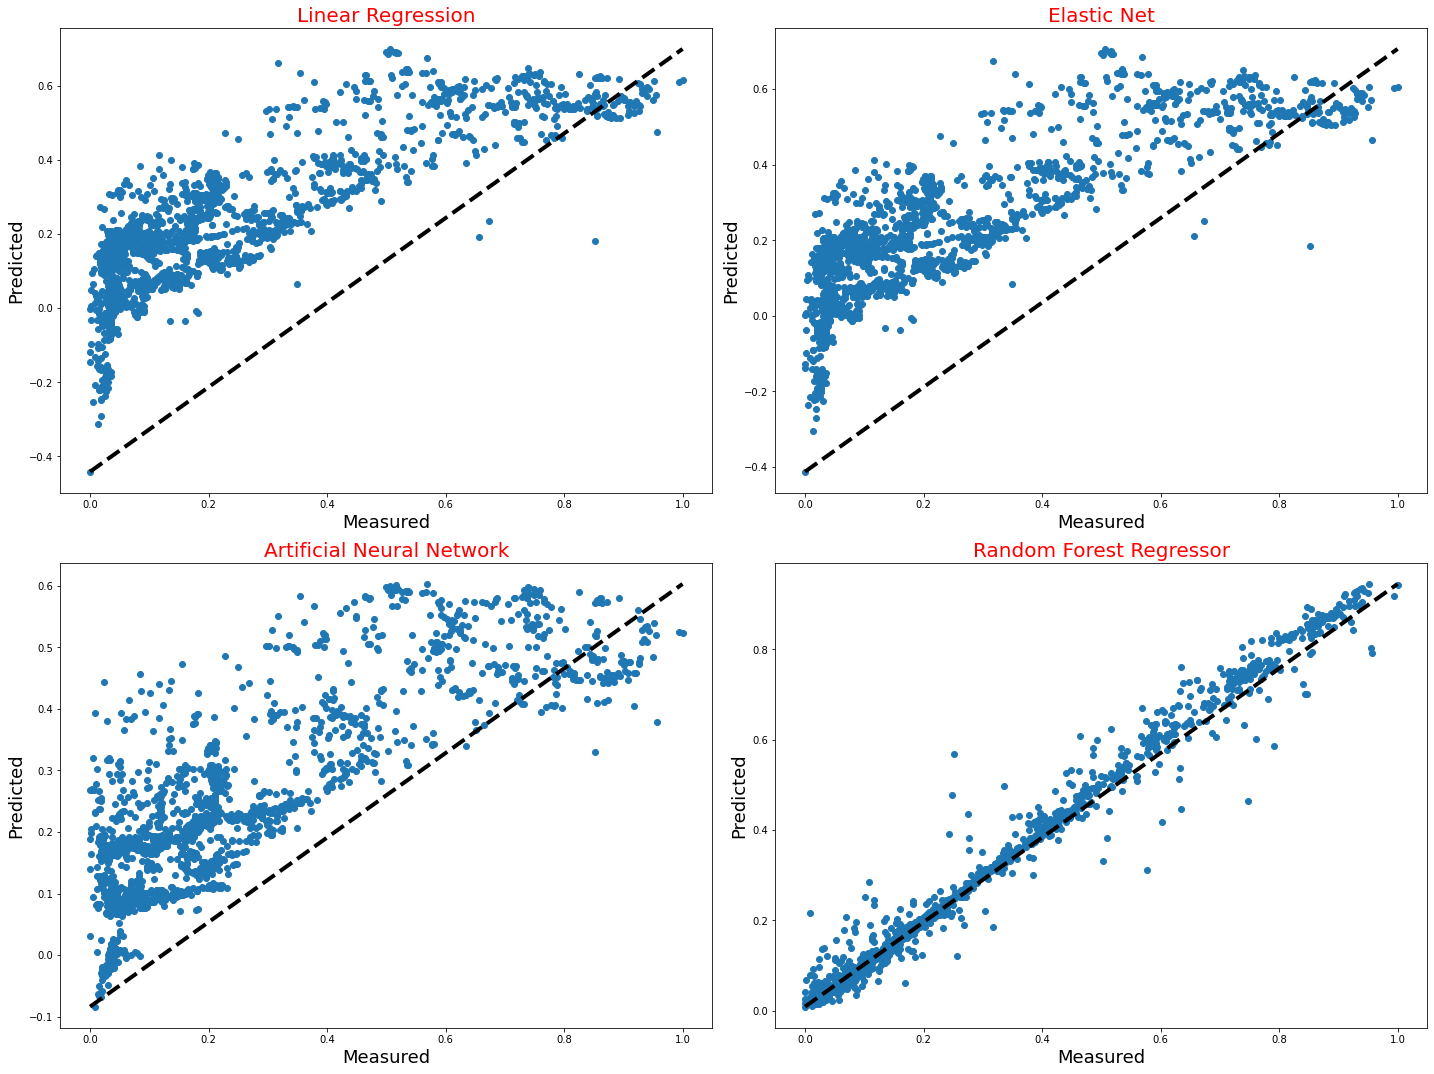

In [43]:
# Word of caution: If you have done more machine learning algorithms, you must change
#                  the number of rows (nrows) and/or the number of columns(ncols) of
#                  the subplot to accomodate all the plots
fig, axes = plt.subplots(nrows=2,ncols=2,figsize=[20, 15])

for i, ax in enumerate(axes.flatten(),1):
    x = prediction['Actual']
    y = prediction.iloc[:,i]
    ax.scatter(x, y)
    ax.plot([x.min(), x.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured', fontsize=18)
    ax.set_ylabel('Predicted', fontsize=18)
    ax.set_title(prediction.columns[i],color='red', fontsize=20)
    
plt.tight_layout(True)  

## Conclusion
Discuss the results (which algorithm was the best and why?) and a path forward in the markdown below. 


The Random Forest Regressor was the best path. It is the best path forward because it is always taking the most optimial pathway through all of its options. There are many different decision trees operating at one time, which means it is running so many different variations of the same problem to get the most optimal path. 



Digital Oil fields should start to improve upon their machine learning by using random forest.
With all the sensors working at one time it would be simple to figure out what data was missing with before and after data. This imlementation of random forest could also give an idea of how much oil could be left and how long it would take for that well. Random forest could be the next great predictor of oil with just including a few more and descriptive paramters for the specfific well. 



We were able to get an R^2 (coefficient of determination) regression score function of 98%. Were you able to do better?


Yes I was able to get a R^2 of 99%. With the values of 'n_estimators': 500, 'min_samples_split': 2, 'max_depth': 15 